In [10]:
import pandas as pd
import csv
import numpy as np
import seaborn as sn
from PIL import Image
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

In [11]:
#Fonctions d'affichage
def niceDisplay14(affichages,titres=None):
    """ list[Array]*list[str] -> NoneType
        display from 1 up to 4 images or vectors with optionnal titles
        2D arrays are displayed as image with imshow()
        1D arrays are displayed as curve with plot()
    """
    
    if not type(affichages) == type([]):
        affichages = [affichages]
        
    if titres is None:
        titres = ['',]*len(affichages)
        
    if not type(titres) == type([]):
        titres = [titres]
    
    nb_affichages = len(affichages)
    if nb_affichages >4 or nb_affichages < 1 :
        raise ValueError('niceDisplay_14 : affichage should be a list of length 1 up to 4')
        
    if nb_affichages != len(titres):
        raise ValueError('niceDisplay_14 : titres must have same length than affichage')
        
    courbes = False
    for i in range(0,nb_affichages):
        s = plt.subplot(101+10*nb_affichages+i)
        s.set_title(titres[i])
            # on affiche une image
        s.imshow(affichages[i])

    agrandissement_h = nb_affichages
    agrandissement_v = nb_affichages*2 if courbes else nb_affichages
    params = plt.gcf()
    plSize = params.get_size_inches()
    params.set_size_inches( (plSize[0]*agrandissement_v, plSize[1]*agrandissement_h) )
    plt.show()

    

def imshow(I, title=None, size=500, axis=False):
    """ display an image, with title, size, and axis """
    plt.figure(figsize=(size//80, size//80))
    plt.gray()
    plt.imshow(I)
    if not axis: plt.axis('off')
    if title: plt.title(title)
    plt.show()

In [12]:
df = pd.read_csv("tags.txt",names=['tag'])
df[['tag','tag_name']] = df["tag"].str.split(" ", 1, expand=True)
print(df)
df.to_csv('tags.csv', index = False)
        


   tag       tag_name
0    1       Abstract
1   24         Action
2   31  Advertisement
3   66         Analog
4   19        Animals
..  ..            ...
61  23         Travel
62  10          Urban
63  11        Vintage
64  28          Water
65  42        Wedding

[66 rows x 2 columns]


In [13]:
t = pd.read_csv("tags.csv")
tn = t.sort_values(by=["tag"])
tn


tag       tag_name
0     1       Abstract
13    2      Cityscape
19    3        Fashion
18    4         Family
26    5       Humorous
..  ...            ...
31   62       Lensbaby
20   63       Fish Eye
10   64  Camera Phones
28   65        Insects
3    66         Analog

[66 rows x 2 columns]

In [14]:
data = pd.read_csv("Ava_EssentialsV1.csv")
data

ID  Tag1  Tag2         B  Entropy_Color  Entropy_BW    E/E_bw  \
0       953417    22     0  6.112903      11.094118    6.689572  2.299058   
1       953777    20    53  6.593750      11.235859    7.698757  2.023211   
2       953756     0     0  5.796875       9.316750    7.766329  1.663045   
3       954195     0     0  5.040984      12.796335    7.210267  2.460309   
4       953903    21    28  5.943548       5.568864    7.566631  1.020280   
...        ...   ...   ...       ...            ...         ...       ...   
249731   56938     9     0  5.339844       7.322678    5.114791  1.984712   
249732   57304     1    18  6.235294       1.932998    1.662843  1.611520   
249733   56711     9    24  7.072581       7.433306    7.579280  1.359595   
249734   57303    22     0  5.608871      12.011088    7.541434  2.207923   
249735   57221    19    21  5.853061       6.655246    7.038293  1.310848   

        Entropy_Color_NonR  
0                15.379713  
1                15.576208  
2                12.915759  
3                17.739487  
4                 7.720084  
...                    ...  
249731           10.151388  
249732            2.679705  
249733           10.304750  
249734           16.650904  
249735            9.226130  

[249736 rows x 8 columns]

In [15]:
data = pd.read_csv("Ava_EssentialsV1.csv")
data

ID  Tag1  Tag2         B  Entropy_Color  Entropy_BW    E/E_bw  \
0       953417    22     0  6.112903      11.094118    6.689572  2.299058   
1       953777    20    53  6.593750      11.235859    7.698757  2.023211   
2       953756     0     0  5.796875       9.316750    7.766329  1.663045   
3       954195     0     0  5.040984      12.796335    7.210267  2.460309   
4       953903    21    28  5.943548       5.568864    7.566631  1.020280   
...        ...   ...   ...       ...            ...         ...       ...   
249731   56938     9     0  5.339844       7.322678    5.114791  1.984712   
249732   57304     1    18  6.235294       1.932998    1.662843  1.611520   
249733   56711     9    24  7.072581       7.433306    7.579280  1.359595   
249734   57303    22     0  5.608871      12.011088    7.541434  2.207923   
249735   57221    19    21  5.853061       6.655246    7.038293  1.310848   

        Entropy_Color_NonR  
0                15.379713  
1                15.576208  
2                12.915759  
3                17.739487  
4                 7.720084  
...                    ...  
249731           10.151388  
249732            2.679705  
249733           10.304750  
249734           16.650904  
249735            9.226130  

[249736 rows x 8 columns]

In [16]:
data2 = data.sort_values(by=["Tag1"])
data2 = data2.reset_index(drop=True)
data2

ID  Tag1  Tag2         B  Entropy_Color  Entropy_BW    E/E_bw  \
0        62985     0     0  5.358333       6.709761    7.300562  1.274108   
1       306760     0     0  4.053571       9.981053    6.985302  1.980827   
2       231248     0     0  5.439114       9.630476    7.284937  1.832641   
3       230961     0     0  5.284644      10.397917    7.491356  1.924161   
4       306512     0     0  4.345992       5.471980    7.466633  1.015957   
...        ...   ...   ...       ...            ...         ...       ...   
249731  958266    65     0  6.112000      10.984758    7.125065  2.137259   
249732  950931    65     0  4.812121      10.153532    7.246610  1.942396   
249733  954186    65     0  5.409836      11.229592    7.184674  2.166768   
249734  955460    65     0  5.037915      10.738268    7.583620  1.962968   
249735  947375    65     0  5.464968       7.720921    6.112286  1.751140   

        Entropy_Color_NonR  
0                 9.301703  
1                13.836677  
2                13.350674  
3                14.414574  
4                 7.585775  
...                    ...  
249731           15.228108  
249732           14.075784  
249733           15.567521  
249734           14.886401  
249735           10.703470  

[249736 rows x 8 columns]

In [17]:
tags = np.array(data2["Tag1"])
tags = np.unique(tags)

tag_names = tn["tag_name"]



In [22]:
def switcheroo(df, tag):
    
    df_prime = df.sort_values(by=["B"], inplace = False)
    df_prime = df_prime.reset_index(drop=True)
    
    bw_entropies = np.array(df_prime["Entropy_BW"])

    color_entropies =np.array(df_prime["Entropy_Color_NonR"])
    rapports = np.array(df_prime["E/E_bw"])
    ratings = np.array(df_prime["B"])
    
    
    rounded_ratings_alpha = np.around(ratings,1)

    rounded_ratings, r_counts = np.unique(rounded_ratings_alpha, return_counts = True)


    r_bw_entropies = np.around(bw_entropies,2)
    r_color_entropies = np.around(color_entropies,2)
    r_rapports = np.around(rapports,2)



    means_E = []
    means_EBW = []
    means_rapports = []
    
    means_E = np.zeros(len(rounded_ratings))
    means_EBW = np.zeros(len(rounded_ratings))
    means_rapports = np.zeros(len(rounded_ratings))
    x = 0
    for r in rounded_ratings:
        indices = np.where(rounded_ratings_alpha == r)
        s = 0
        s1 = 0
        s2 = 0
        for i in indices:
            s = s + r_color_entropies[i]
            s1 += r_bw_entropies[i]
            s2 += r_rapports[i]
    
        mean = s.mean()
        #print(mean)
        means_E[x] = mean
    
        mean = s1.mean()
        means_EBW[x] = mean
    
        mean = s2.mean()
        means_rapports[x] = mean
        x = x+1
        
    _, ax = plt.subplots(ncols=3,nrows=1,figsize=(17, 5))
    titles = ['Entropy BW', 'Entropy Color', 'Rapports']

    
    ax[0].plot(rounded_ratings, means_EBW, '-o')
    ax[0].set_title(titles[0] + ' Tag : ' +  tag_names[tag])
    ax[0].set_xlabel('Notes')
    ax[0].set_ylabel('Entropies')

    ax[1].plot(rounded_ratings, means_E, '-o')
    ax[1].set_title(titles[1]+ ' Tag : ' +  tag_names[tag])
    ax[1].set_xlabel('Notes')
    ax[1].set_ylabel('Entropies')
    
    ax[2].plot(rounded_ratings, means_rapports, '-o')
    ax[2].set_title(titles[2]+ ' Tag : ' +  tag_names[tag])
    ax[2].set_xlabel('Notes')
    ax[2].set_ylabel('Entropies')
    
    plt.show() 




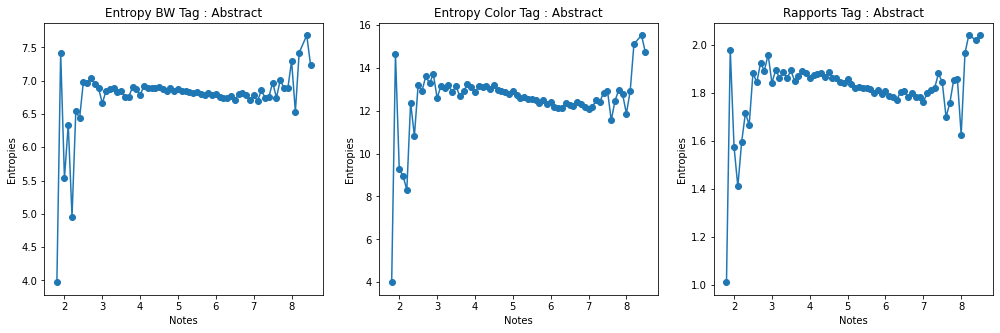

0


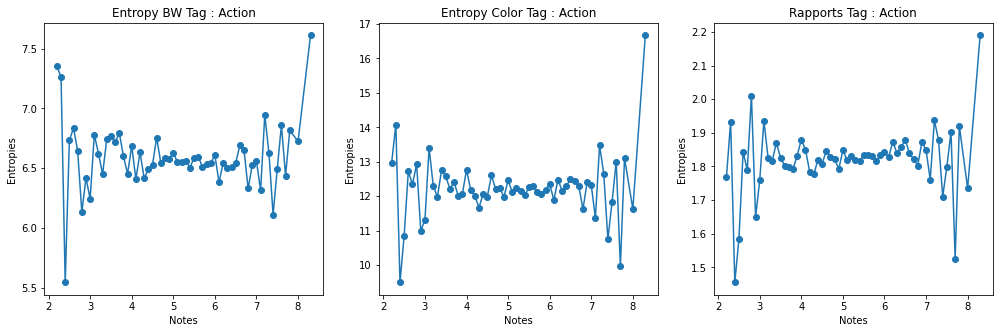

1


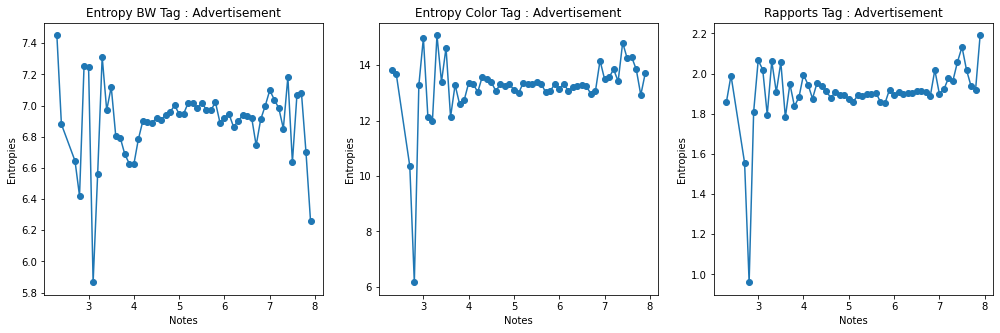

2


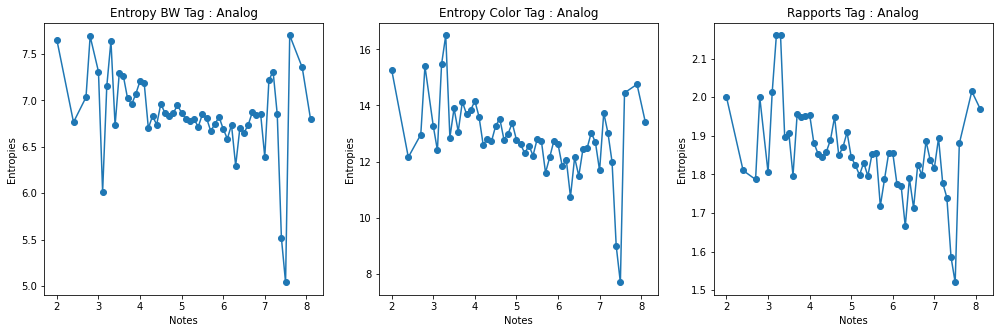

3


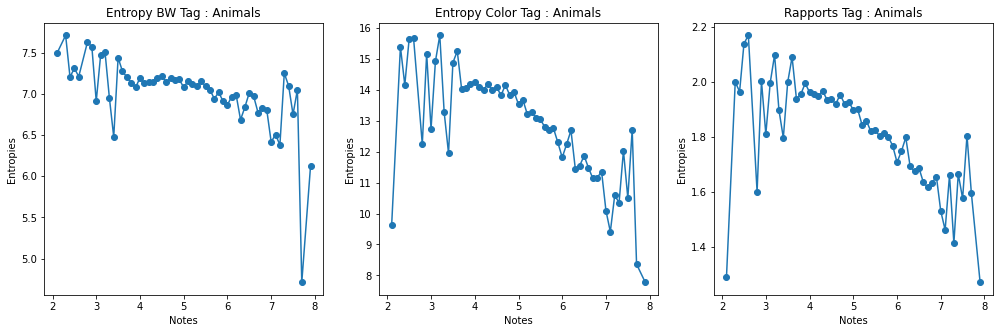

4


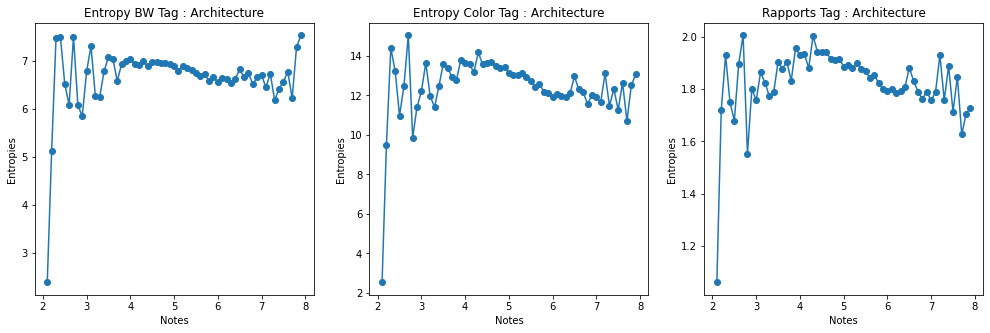

5


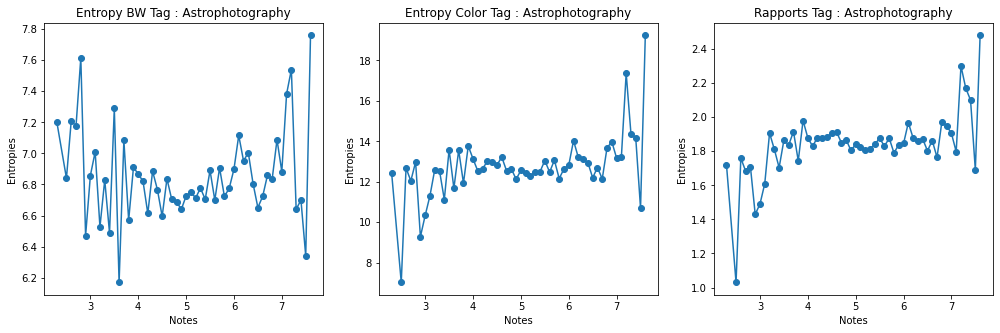

6


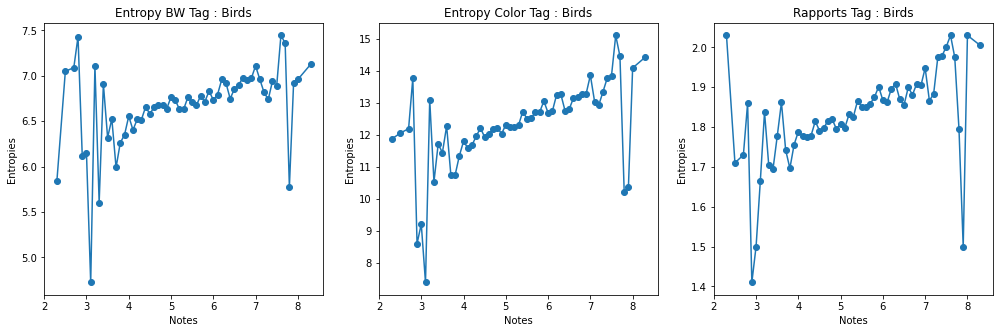

7


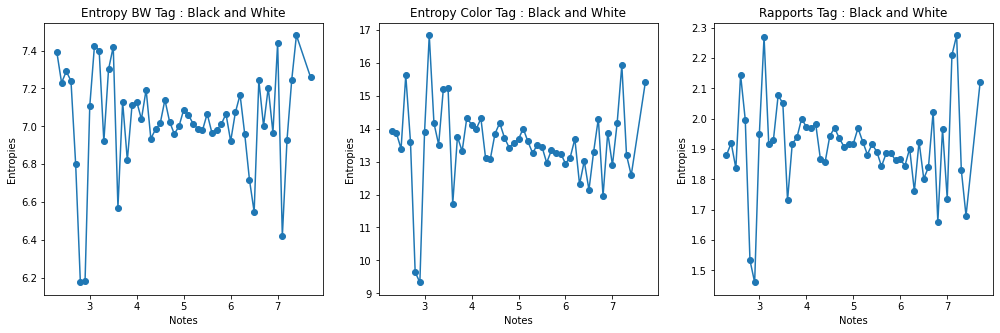

8


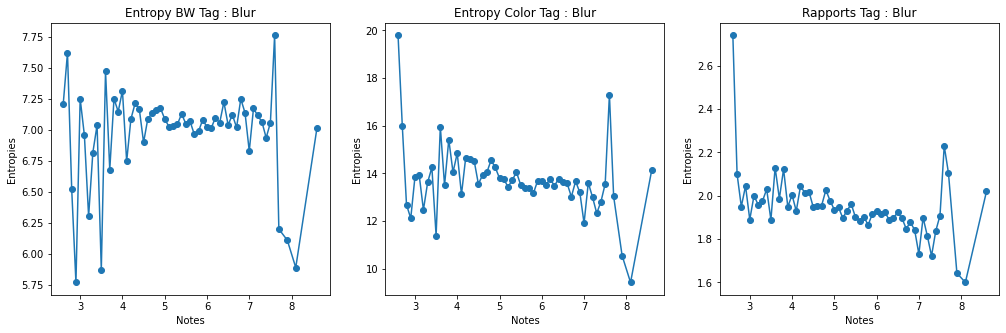

9


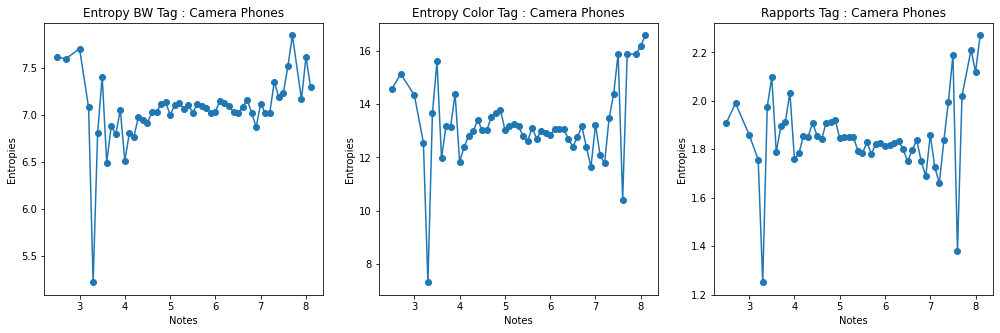

10


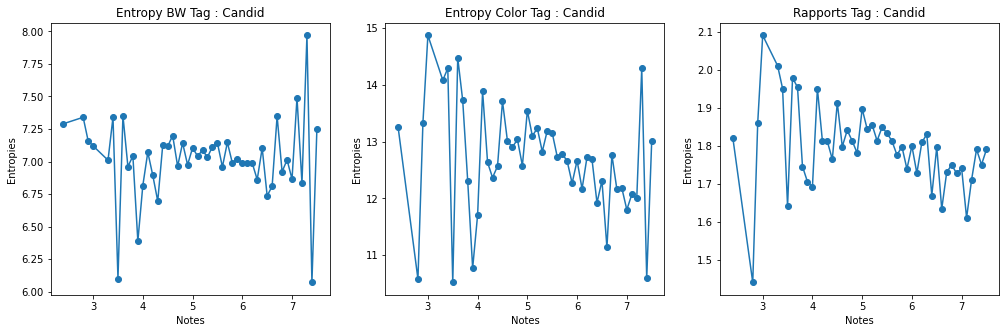

11


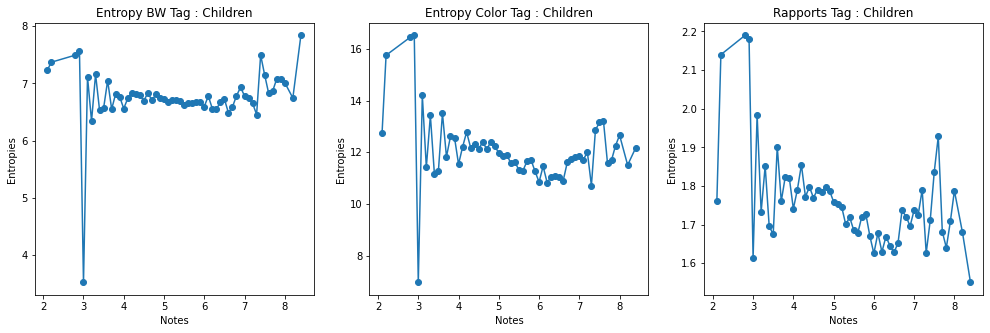

12


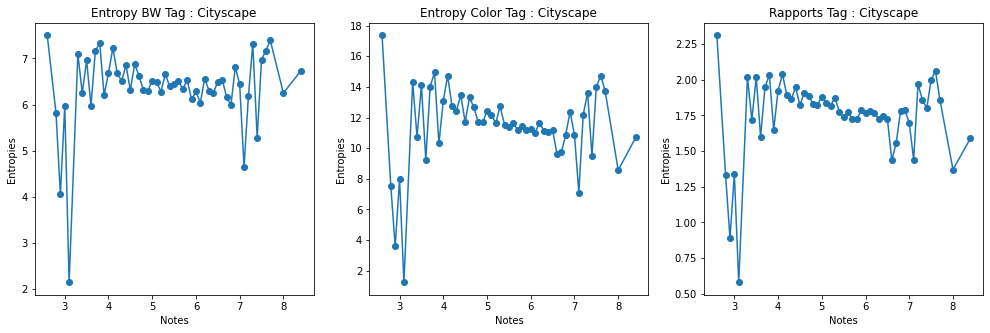

13


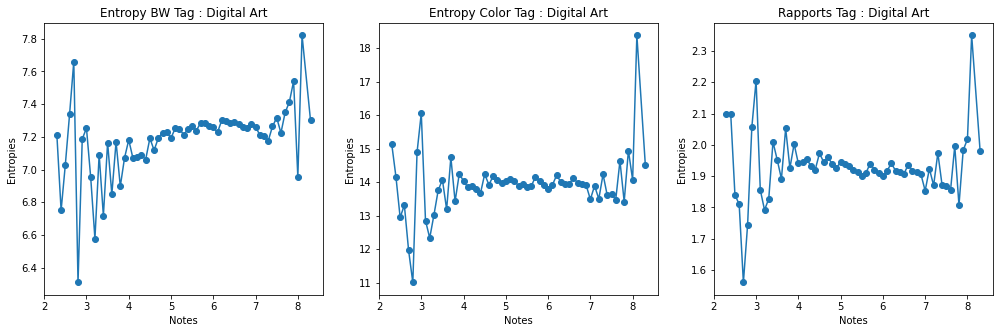

14


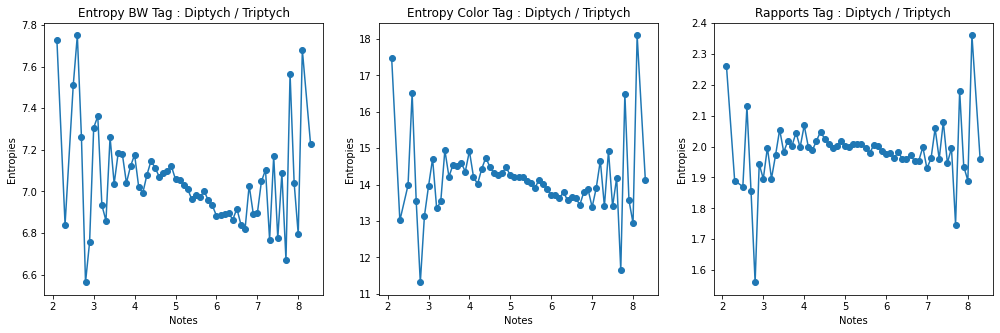

15


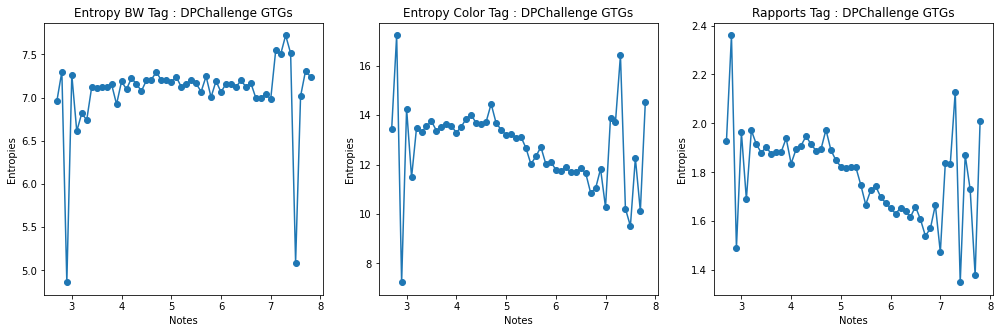

16


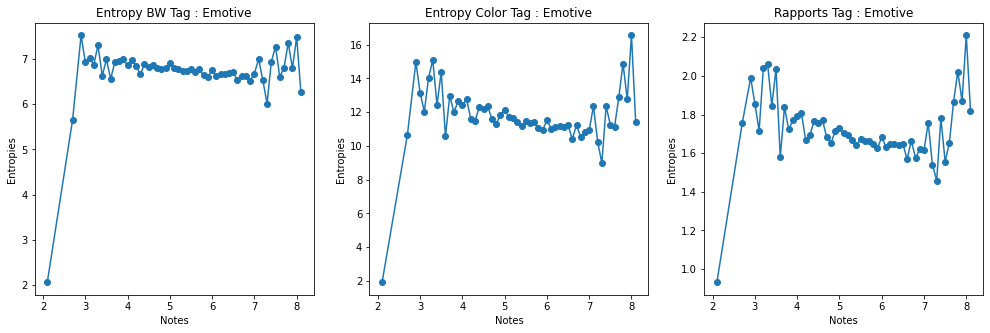

17


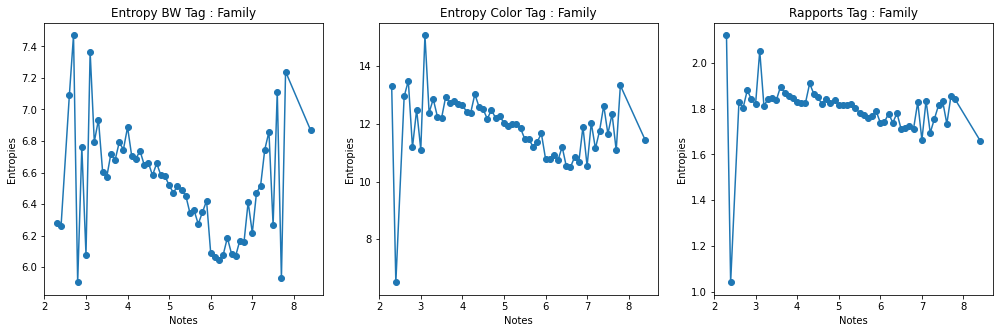

18


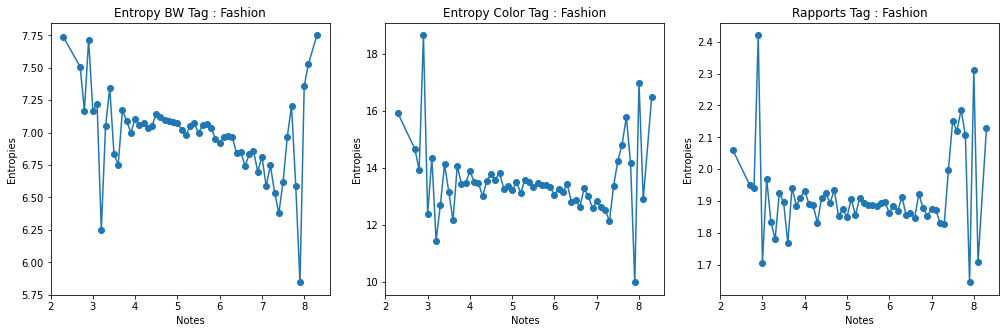

19


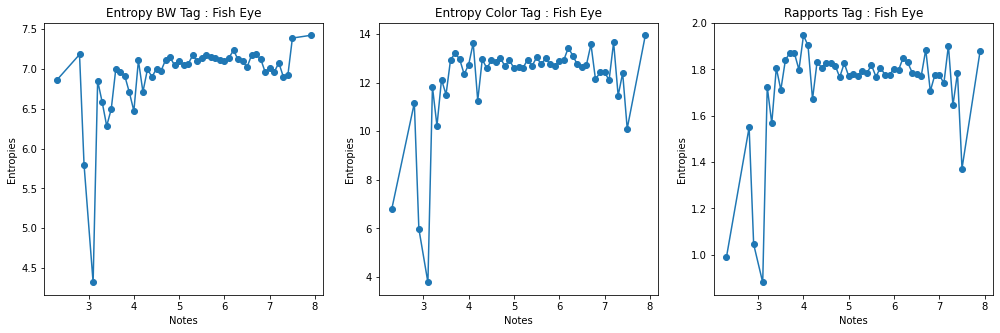

20


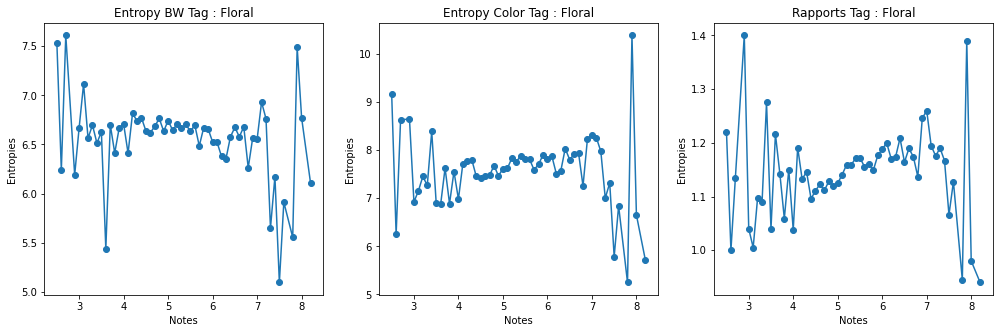

21


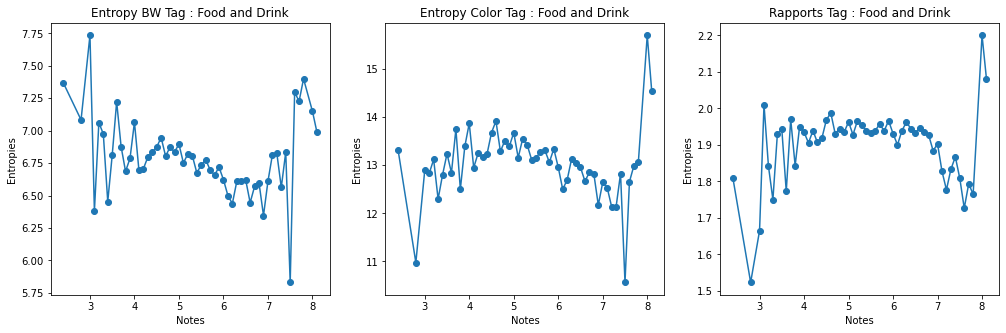

22


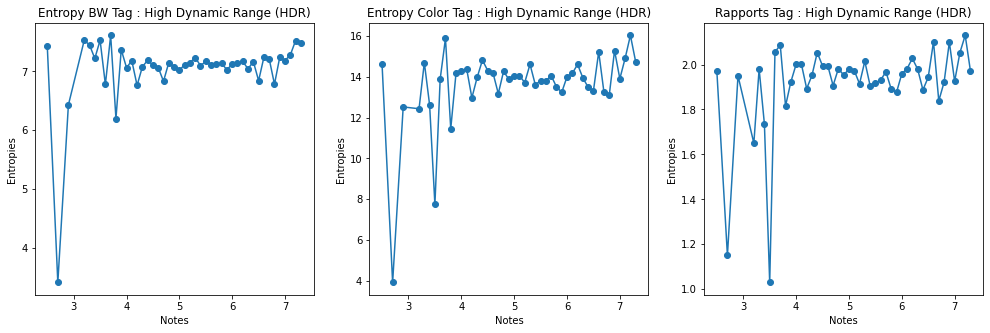

23


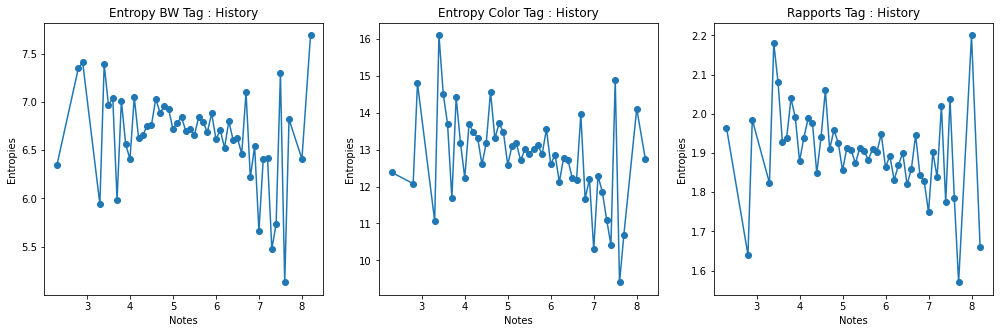

24


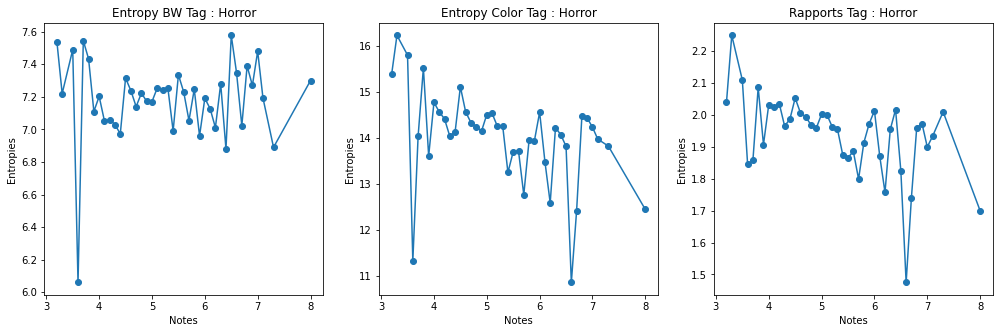

25


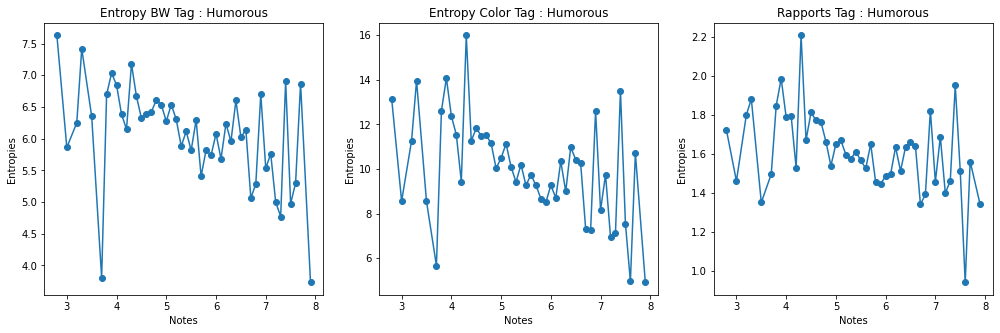

26


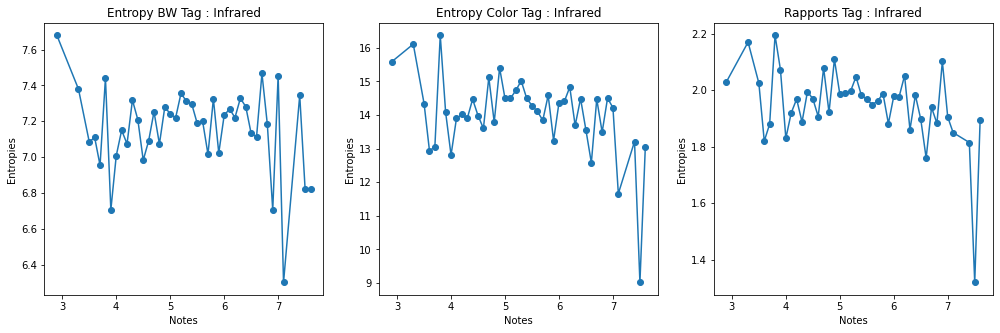

27


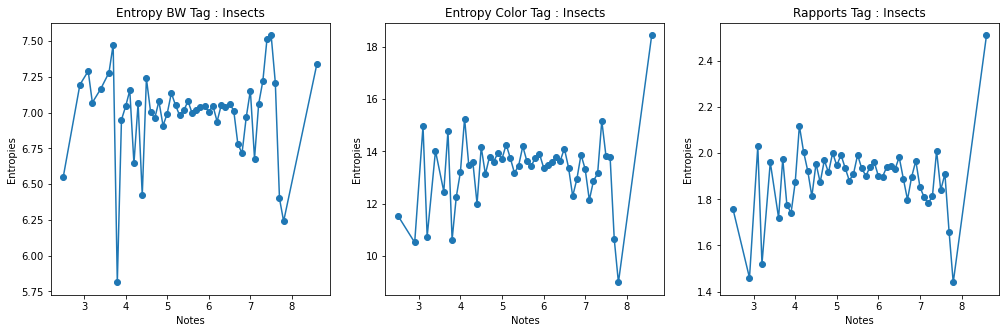

28


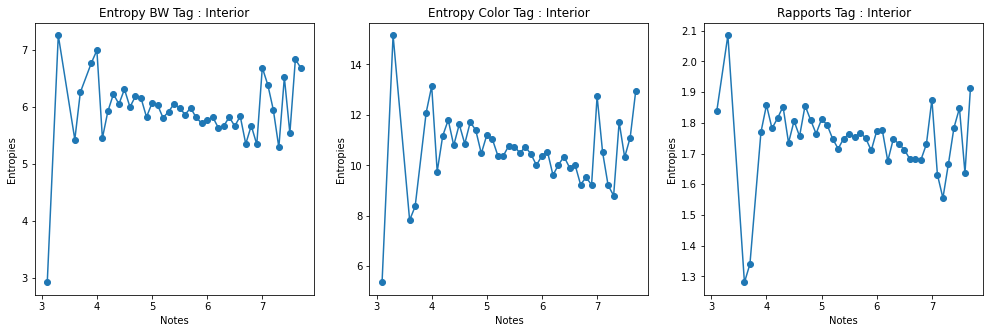

29


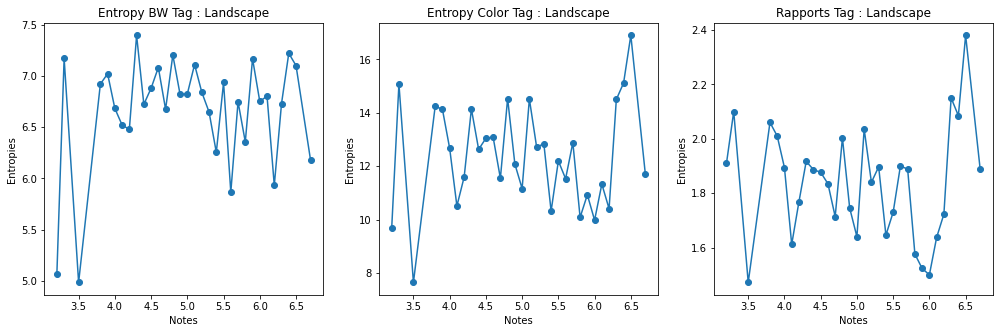

30


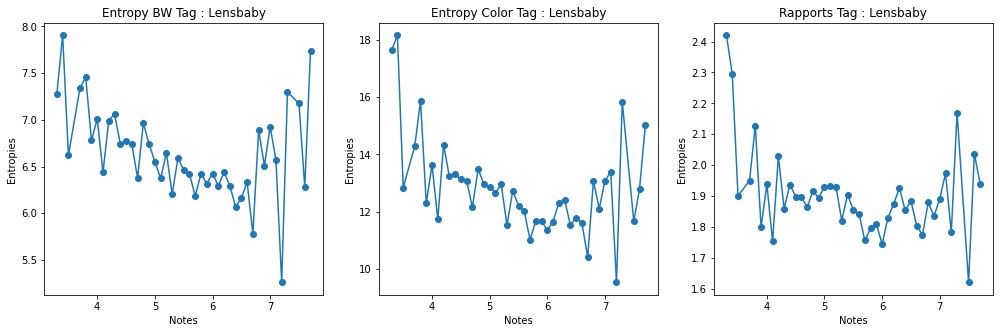

31


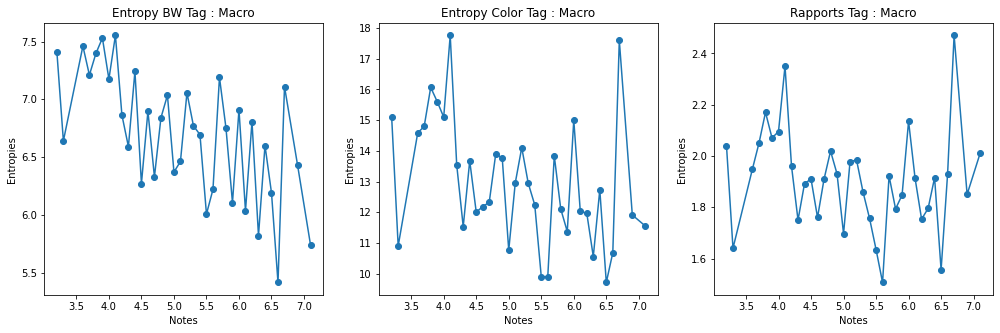

32


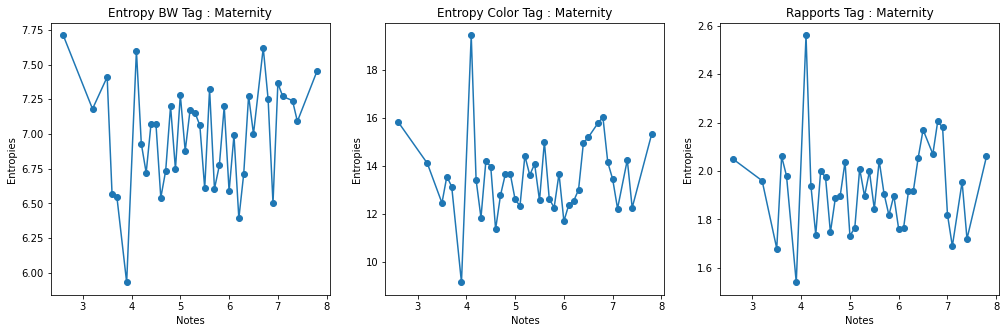

33


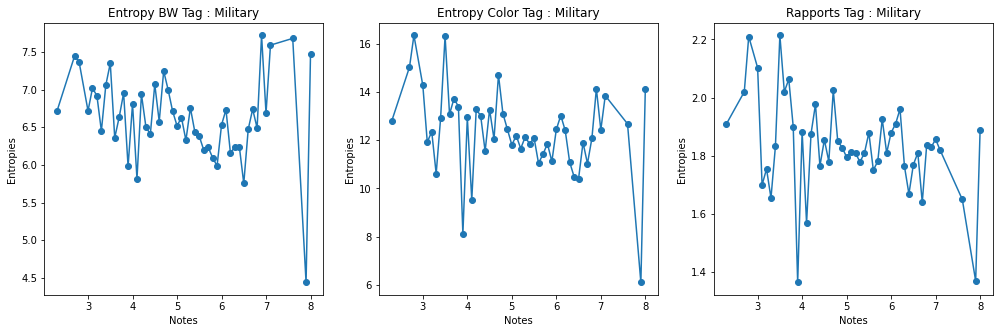

34


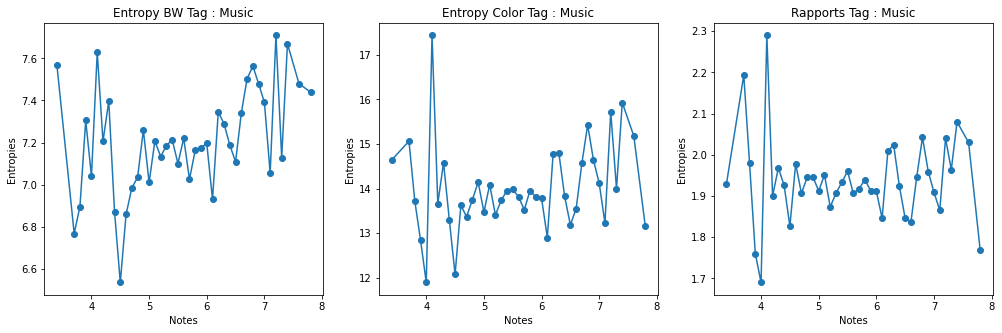

35


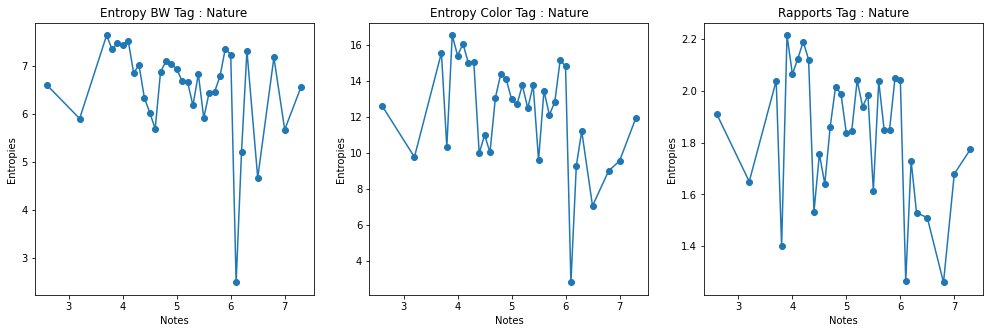

36


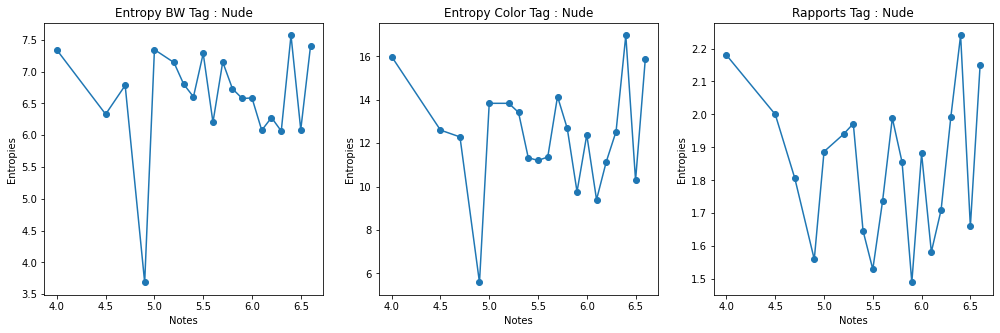

37


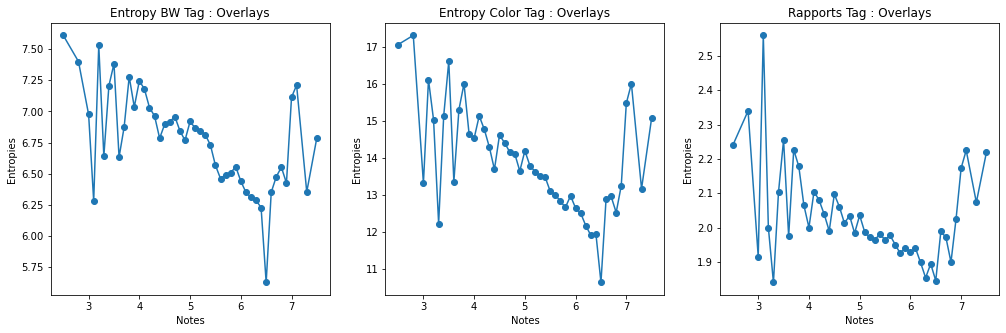

38


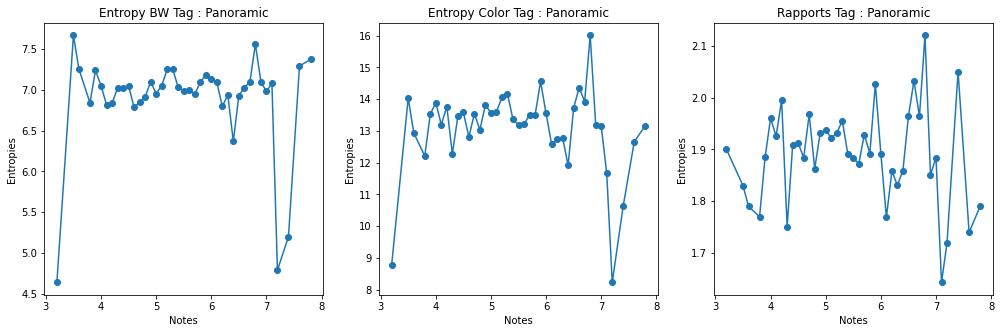

39


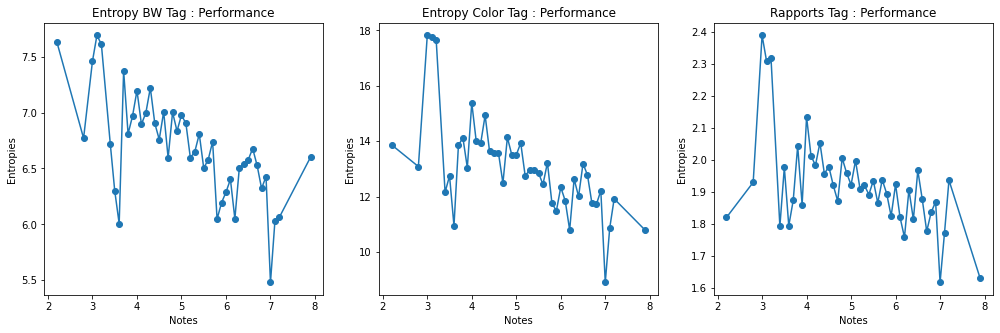

40


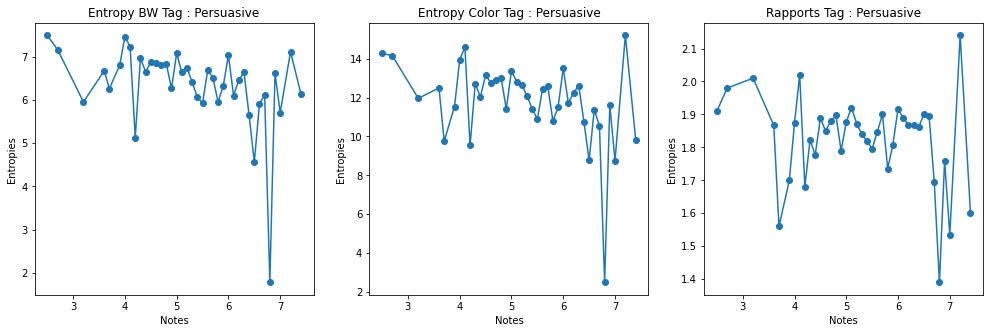

41


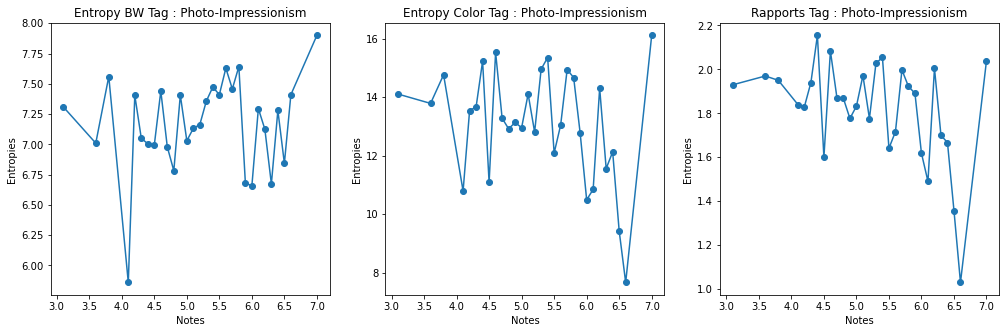

42


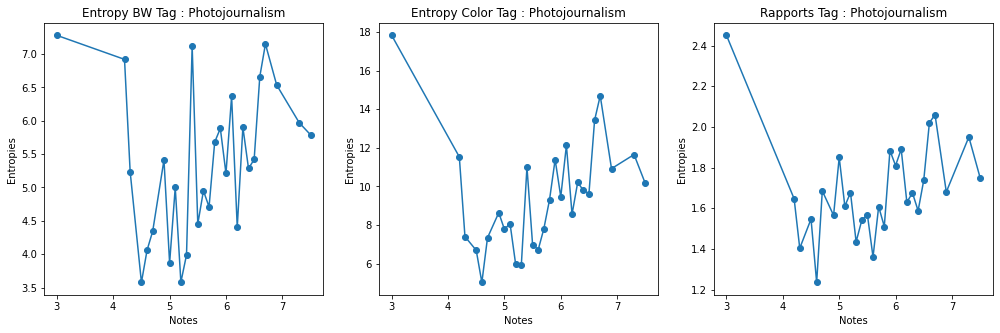

43


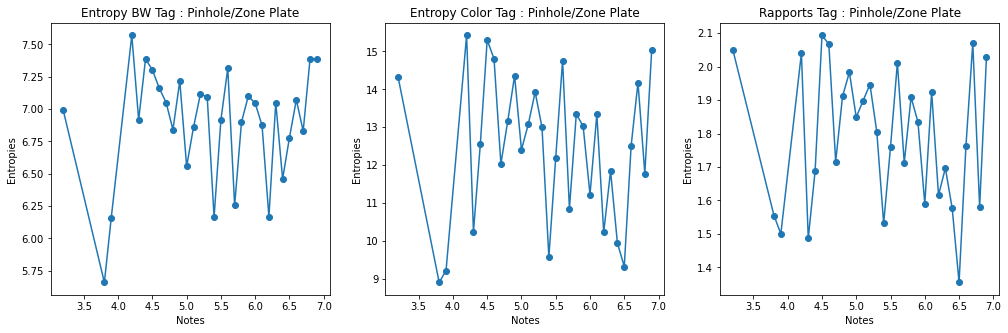

44


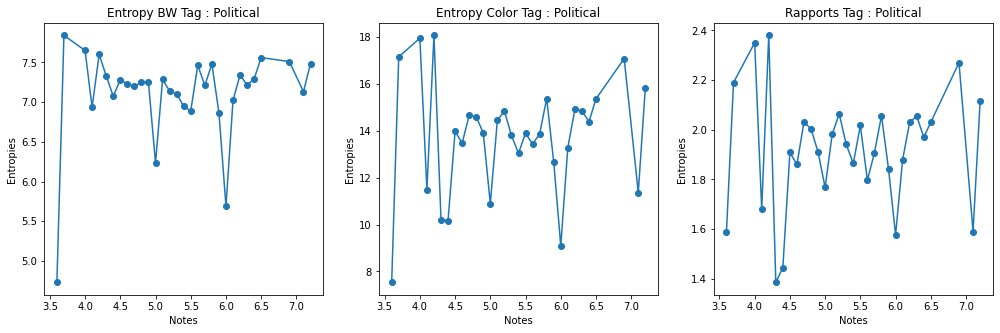

45


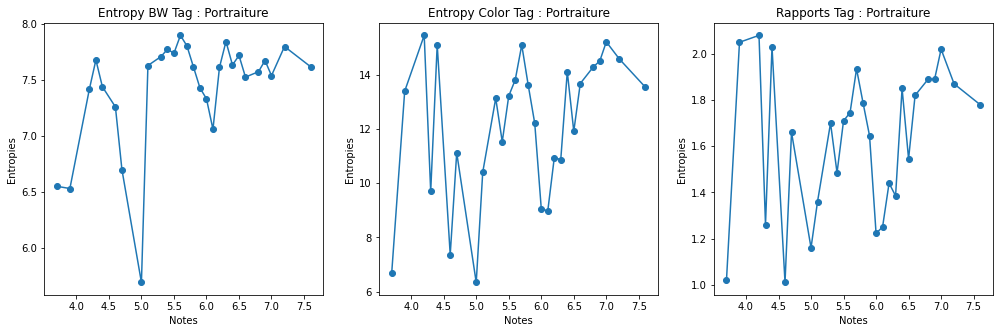

46


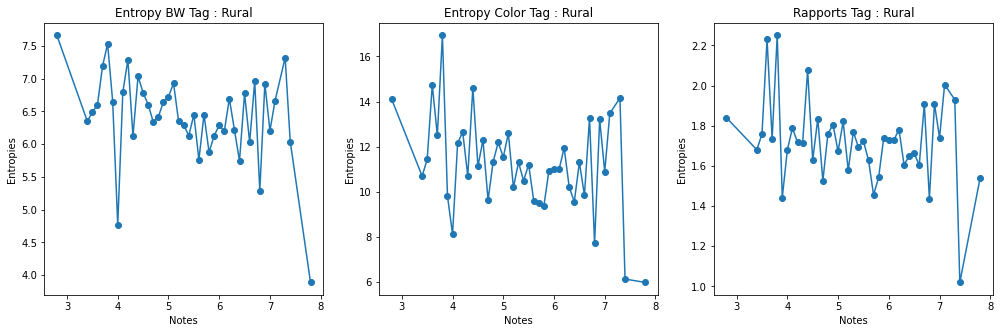

47


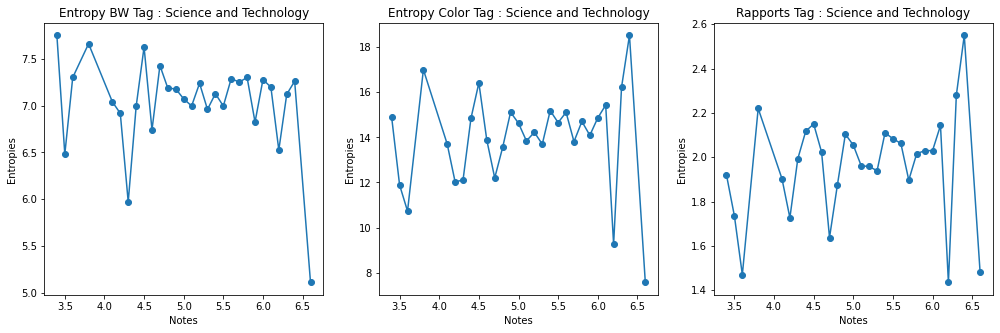

48


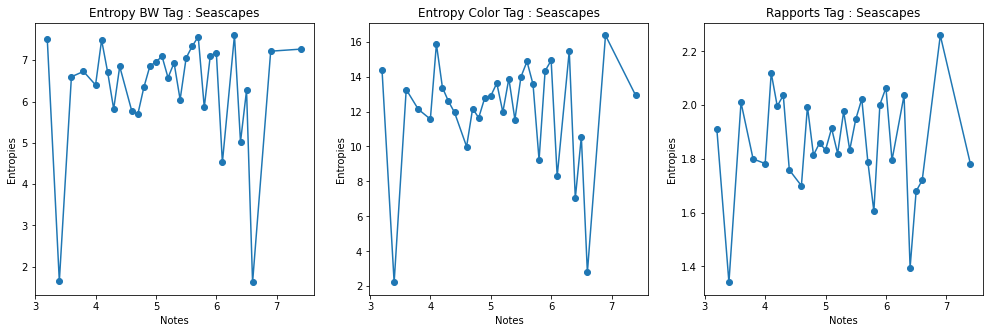

49


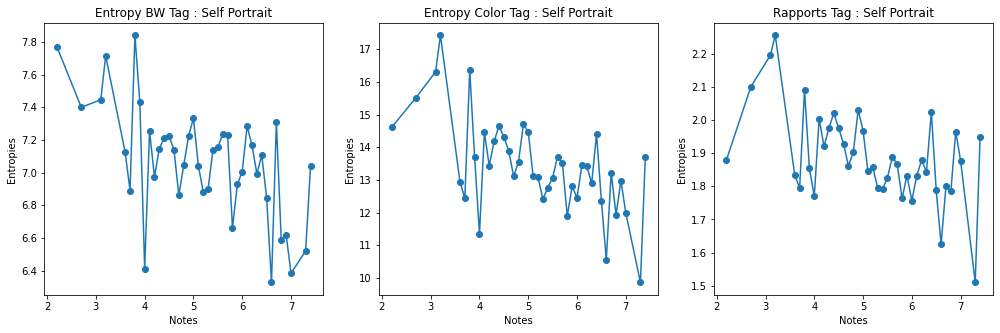

50


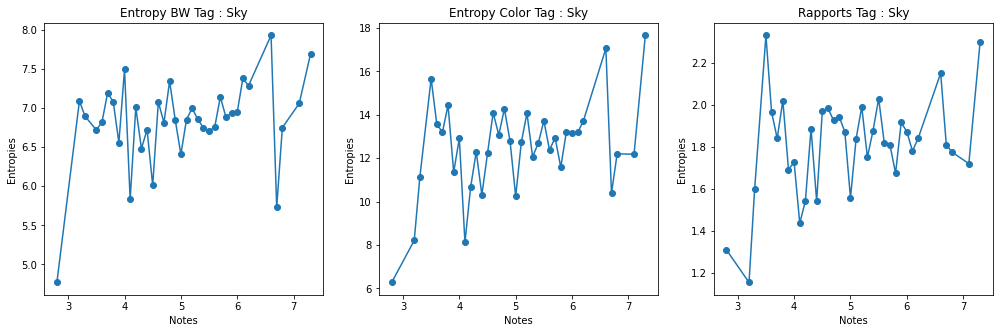

51


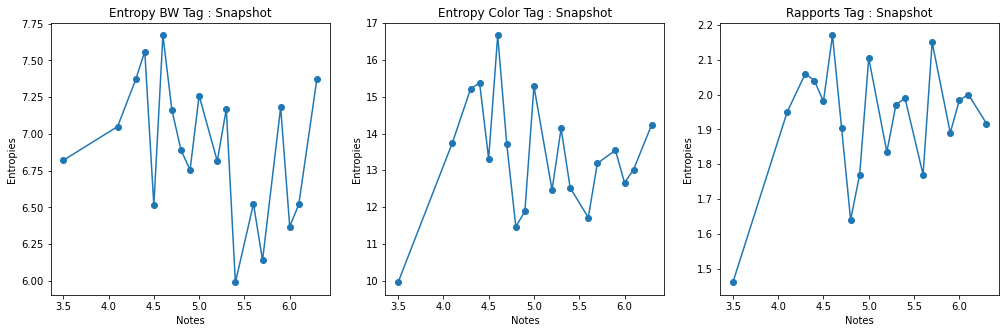

52


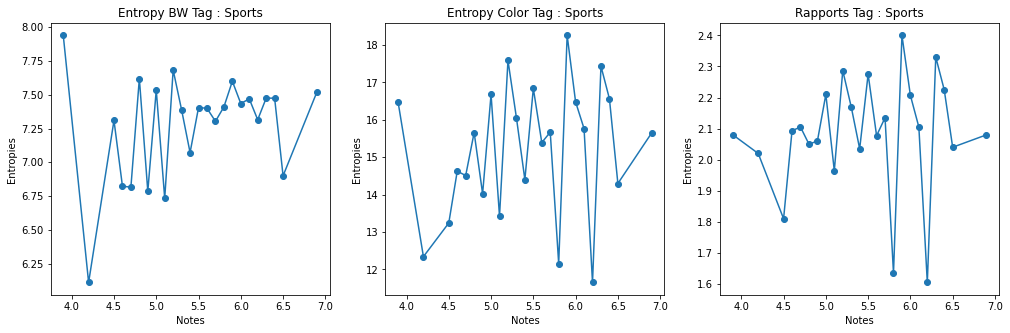

53


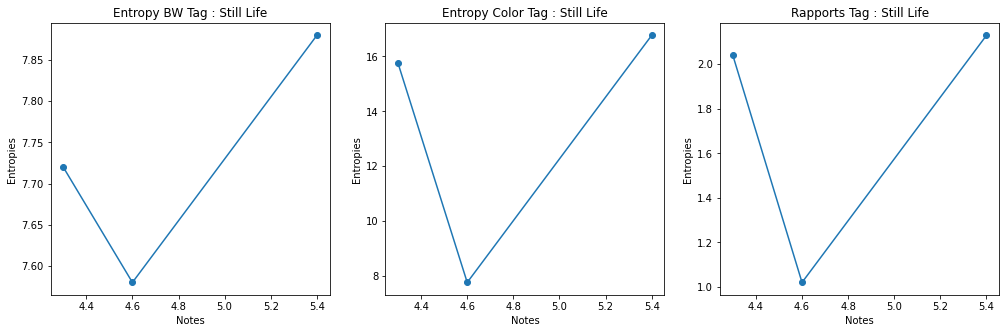

54


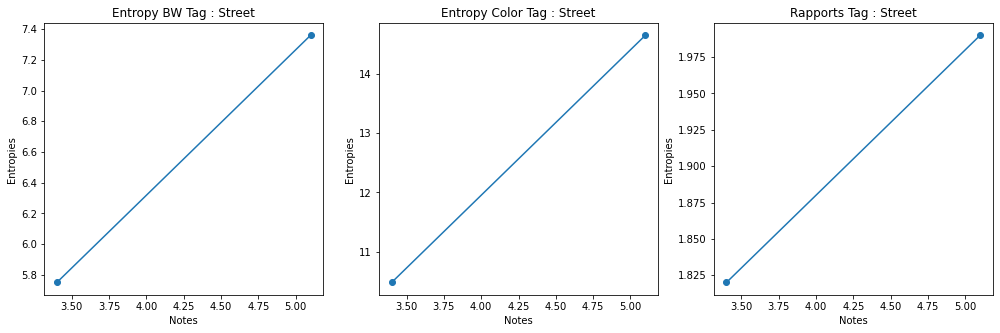

55


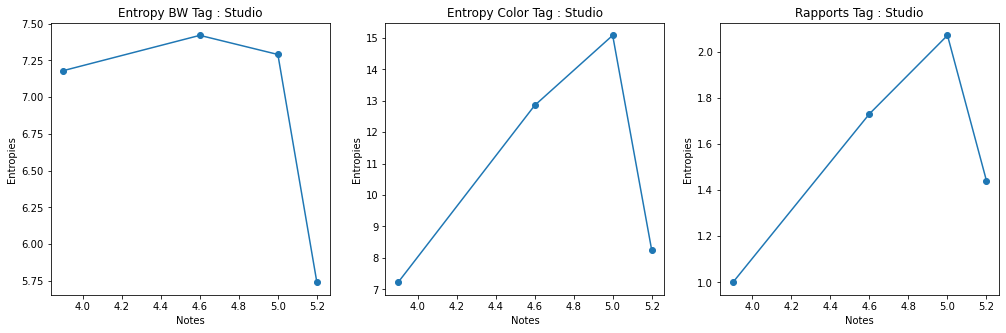

56


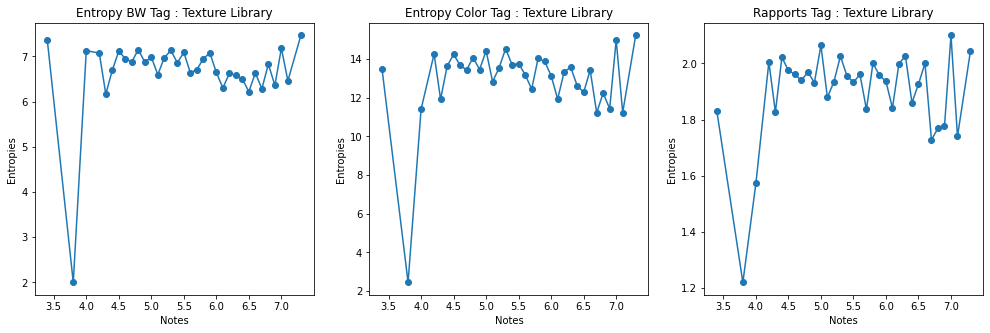

57


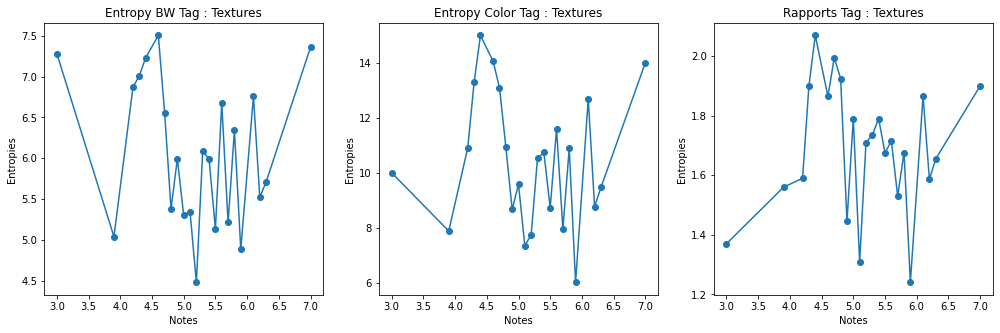

58


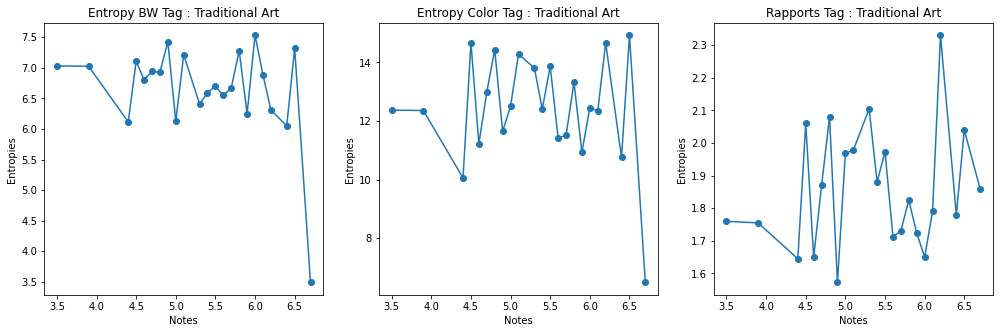

59


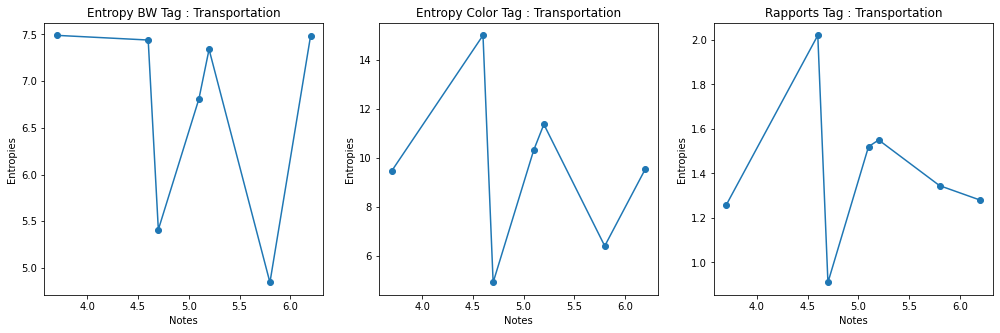

60


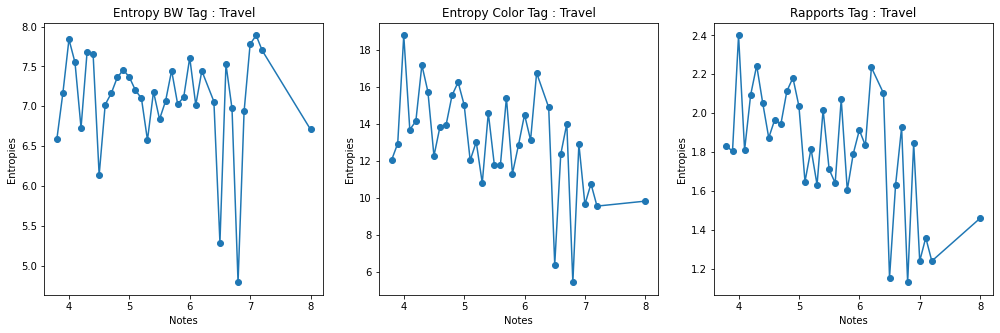

61


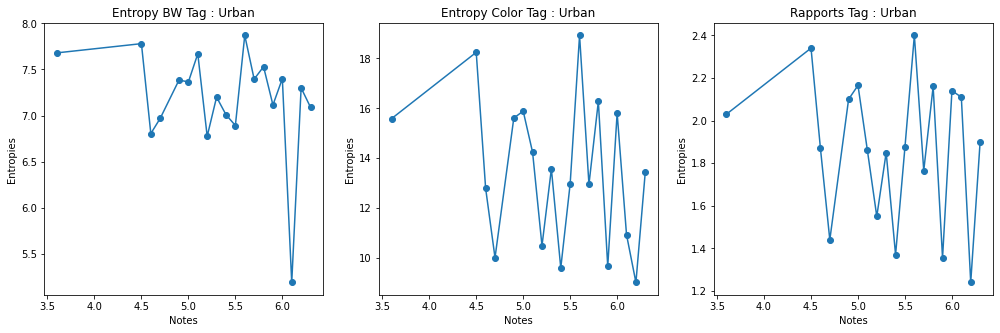

62


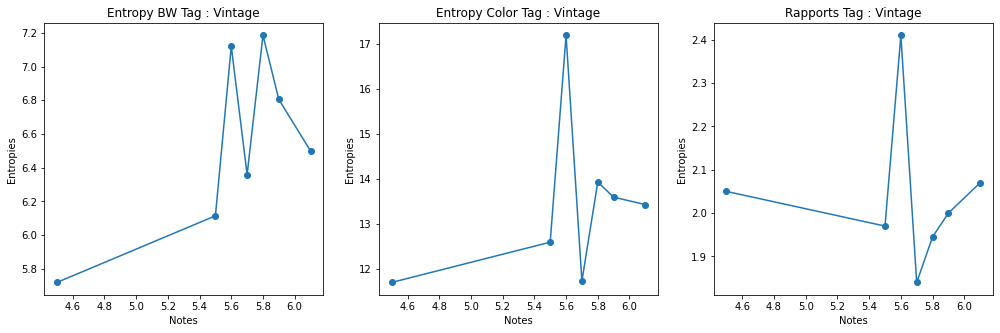

63


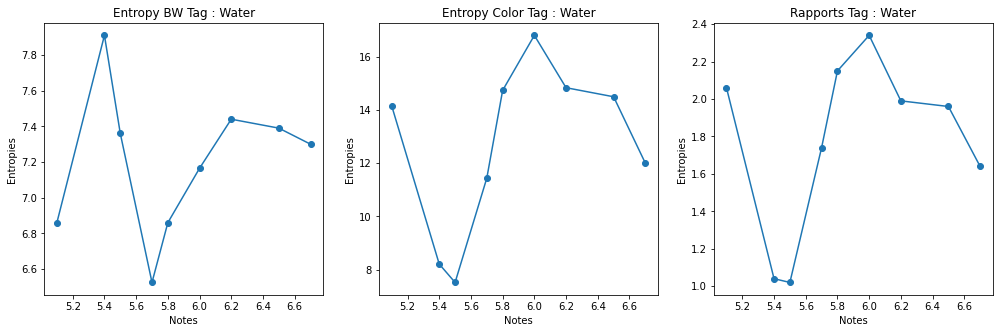

64


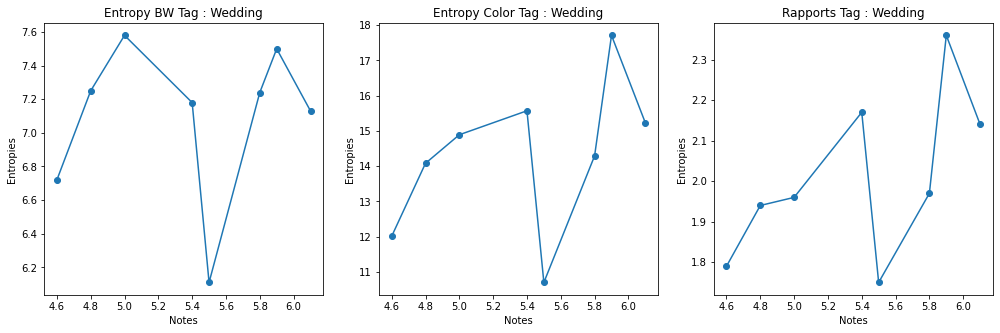

65


In [23]:
for i in tags:
    df = data2[data2["Tag1"]==i].copy()
    switcheroo(df, i)
    print(i)
    
    